(fin-edu:principles:investing)=
# Principles of investing

(fin-edu:principles:return)=
## Return

Return is the reward for investing. It can come from **capital gain** (price increase of assets bought), or **periodic cashflows**, like interest (from bonds), or dividends (from stocks). Some assets produce predictable return (either nominal, or real), other assets have less predictable returns. Any asset has some level of uncertainty, or [risk](fin-edu:principles:rr)[^risk-rare-events]. 

[^risk-rare-events]: Even the most safe assets could undergo some (really) **rare**, but usually (really) **catastrophic events**. Just as an example, it's hard to imagine what could happen even to bonds issued by the most (perceived and priced) safe government or institution, in case of its participation in a war.

Most returns are quoted on a **per-period** basis - usually annually - and expressed as the percentage of the reward over the initial amount of the investment.

<!--
```{prf:example} 1-period returns
An amount of $1000$€ in saving account returning $2\%$ per year, returns $0.02 \cdot 1000\text{€} = 20$€ at the end of the year, so that the amount in the saving account becomes $1000\text{€} \cdot 1.02 = 1020\text{€}$. Usually some [costs](fin-edu:principles:return:costs) must be also considered.
...

```

```{prf:example} 1-period return of equity investment
:class: dropdown

...given costs, dividends, taxes, buying and selling prices, evaluate return...

```
-->

For a many-year investment, single-period returns [**compound**](fin-edu:principles:time:compunding) over time.



(fin-edu:principles:return:costs)=
### Costs

While return are uncertain, at least to a certain level, usually costs - fees, expenses, taxes - or part of them, are certain. With equal other conditions, the intelligent investor should reduce costs (known), as higher costs reduce returns w/o changing the level of risk.


(fin-edu:principles:risk)=
## Risk

Risk measures uncertainty and its effects, combining probability of events and consequences of specific events. *All the assets have some systematic and some specific risks*
.
<!-- Some risks are systematic (like market crashes); others are specific (like a company going bankrupt).-->
Key measures (*should give info about magnitude, frequency/probability, and duration*) include:
- standard deviation or **volatility**: how much returns may deviate from their expected value),
- max loss (usually 100% can't be neglected for catastrophic although rare events), value at risk (VaR, max loss with a given probability), drawdown (maximum peak-to-trough loss)
- time-to-recover (time to recover drawdowns, in a temporal perspective)

Usually, risk metrics measure uncertainty, without discerning from positive and negative events: these metrics perceive a higher-than-expected return as a risk as well. Some metrics instead, see *Sortino ratio* in [risk-return](fin-edu:principles:rr) section, aims at quantifying only negative events as risk.

<!--
```{prf:example} Value at Risk

A 1-year 5% VaR of $1000\text{€}$ of an investment it means that there's 5% probability of losing at least $1000\text{€}$ in a year with that investment.

```
-->

(fin-edu:principles:rr)=
## Risk-Return Trade Off

```{admonition} "There's no free lunch"
:class: tip

Higher expected returns usually come with higher risk.
```

```{admonition} ...but high risk doesn't imply high expected return
:class: warning

Very stupid actions usually implies poor return with high risk. Just as an example, playing Russian roulette for fun implies an expected return worse than an alternative "do-nothing and have an ice-cream instead" scenario (at least, if your goal is not to kill yourself, and your return function does not positively weight this outcome) with higher uncertainty on the final status of your health.

Sometimes the same could happen if one plays doing trading with some random meme-stocks or shit-coins.

```


**Risk-adjusted return** provides an indication of the expected return per unit of risk. Common metrics are:
- **Sharpe ratio**, comparing excess return and volatility compared with a "risk-free" asset - or a benchmark

  $$S := \dfrac{\mathbb{E}[R-R_b]}{\sqrt{\text{var}[R-R_b]}}$$

- **Sortino ratio**
  
  $$So := \dfrac{\mathbb{E}[R] - T}{\text{DR}} \ ,$$

  with $T$ target return, and $\text{DR}$ the downside deviation, i.e. the deviation w.r.t the target return evaluated only for returns $r$ lower than the target return $T$

  $$\text{DR}^2 = \int_{r=-\infty}^{T} (T-r)^2 \, f(r) \, dr \ ,$$

  being $f(r)$ the probability density function of the (continuous) random variable $R$ representing return

<!--
```{prf:example}

```
-->

(fin-edu:principles:diversification)=
## Diversification

Diversification spreads risk across different investments so no single event can ruin your portfolio. Diversification works well with assets that are not - or at least they're loosely - correlated: in this case, diversification could increase return per unit of risk.

(fin-edu:principles:asset-allocation)=
## Portfolio Construction


(fin-edu:principles:time)=
## Time



(fin-edu:principles:time:compunding)=
### Compound Return



(Text(0.5, 0, 't'), None)

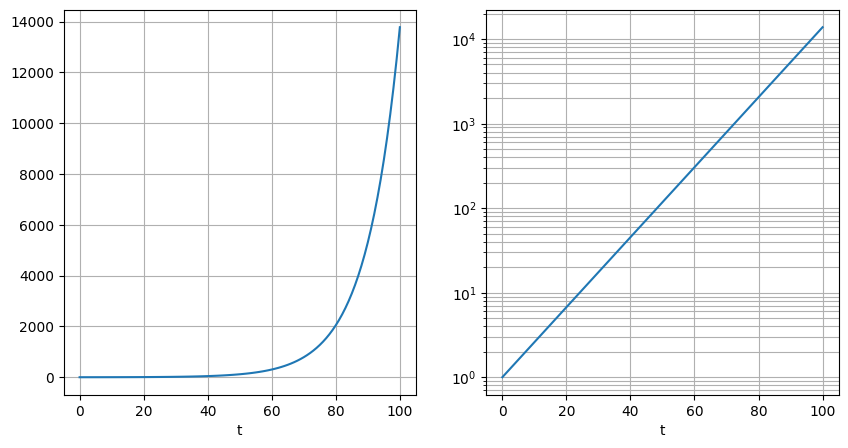

In [9]:
import numpy as np
import matplotlib.pyplot as plt

y0, mu = 1., 0.10
tv = np.arange(101)
yv = y0*(1+mu)**tv

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(    tv, yv); ax[0].set_xlabel('t'), ax[0].grid()
ax[1].semilogy(tv, yv); ax[1].set_xlabel('t'), ax[1].grid(which="both")


(fin-edu:principles:time:volatility-drag)=
#### Volatility Drag

Under the assumption of normal distribution of 1-period return, the price of an asset with constant expected return $\mu$ and variance of returns $\sigma$ can be modelled as a [**geometric Brownian motion**](https://basics2022.github.io/bbooks-statistics/ch/prob/processes-calculus.html#geometric-brownian-motion-gbm), whose compound 1-period (usually annual, and thus the acronym *CAGR, compund annual growth rate*) growth rate has expected value 

$$CAGR = \mu - \frac{\sigma^2}{2} \ .$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y0, mu, sig = 1., 0.10, 0.2
mu_gbm = mu - .5 * sig**2
sig_gbm = sig
nt = 101

tv = np.arange(nt)

#> Realizations
nreal = 500
#> Random number generator of the increment
rng = np.random.default_rng().normal
rng_params = {'loc': mu, 'scale': sig, 'size': nt}

yreal = np.array([ y0*np.cumprod(1 + rng(**rng_params)) for ireal in np.arange(nreal) ]).T

y_no_vol = y0*(1+mu)**tv
y_gbm_exp = y0*(1+mu_gbm)**tv

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].semilogy(tv, yreal, lw=.1, color=plt.cm.tab10.colors[0])
# ax[0].plot(tv, yv); ax[0].set_xlabel('t'), ax[0].grid()
ax[0].semilogy(tv, y_no_vol ,'--', color='red', label=f'no-vol, $\sigma$=0, $\mu$=CAGR={mu}')
ax[0].semilogy(tv, y_gbm_exp, '-', color='black', label=f'GBM, $\sigma$={sig}, $\mu$={mu}, CAGR={mu_gbm}')
ax[0].semilogy(tv, y_gbm_exp*np.exp(-sig*np.sqrt(tv)),':', color='black')
ax[0].semilogy(tv, y_gbm_exp*np.exp( sig*np.sqrt(tv)),':', color='black')
ax[0].set_xlabel('t'), ax[0].grid(which="both"), ax[0].legend()
ax[0].set_title('Time evolution')
ax[1].hist((yreal[-1,:])**(1/nt), density=True)
ax[1].set_title(f'CAGR at t={tv[-1]}, ({nreal} realizations)')
ax[1].grid()


**todo**
- *"Time and risk?" Listen to The Logic of Risk*

(fin-edu:principles:investing)=
## Disciplined Investing

(fin-edu:principles:rebalancing)=
### Rebalancing

[Colab Notebook, rebalancing.ipynb](https://colab.research.google.com/drive/1Mi3_9T7XN7xUl9XNfsdkMfqQTqRFzG8L?authuser=1#scrollTo=QUq8nMHq3bb5)

(fin-edu:principles:rebalancing:premium)=
#### Rebalancing premium
